In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/Colab\ Notebooks/Object\ detection/object-detection-notebooks

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Object detection/object-detection-notebooks


In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import pickle
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = load_model('classification+localization.h5')
lb = pickle.loads(open('lb3.pickle', "rb").read())

In [5]:
def inference(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return model.predict(image)

def draw_bbox(img, boxPreds, labelPreds):
    image = np.copy(img)
    (h, w) = image.shape[:2]
    
    # predict the bounding box of the object along with the class label
    (startX, startY, endX, endY) = boxPreds[0]

    # determine the class label with the largest predicted probability
    i = np.argmax(labelPreds, axis=1)
    label = lb.classes_[i][0]

    # scale the predicted bounding box coordinates based on the image
    # dimensions
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)

    # draw the predicted bounding box and class label on the image
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (0, 255, 0), 2)
    cv2.rectangle(image, (startX, startY), (endX, endY),
        (0, 255, 0), 2)
    
    return image

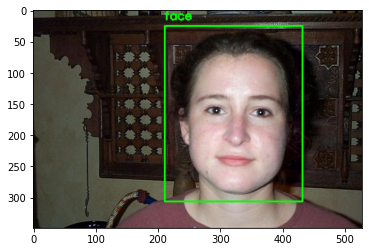

In [6]:
imagePath='./dataset2/images/face/image_0132.jpg'
#imagePath='./dataset2/images/motorcycle/image_0005.jpg'
image = plt.imread(imagePath)
(boxPreds, labelPreds) = inference(imagePath)
image_with_bbox = draw_bbox(image, boxPreds, labelPreds)
plt.imshow(image_with_bbox)

Source:

https://www.pyimagesearch.com/2020/10/12/multi-class-object-detection-and-bounding-box-regression-with-keras-tensorflow-and-deep-learning/